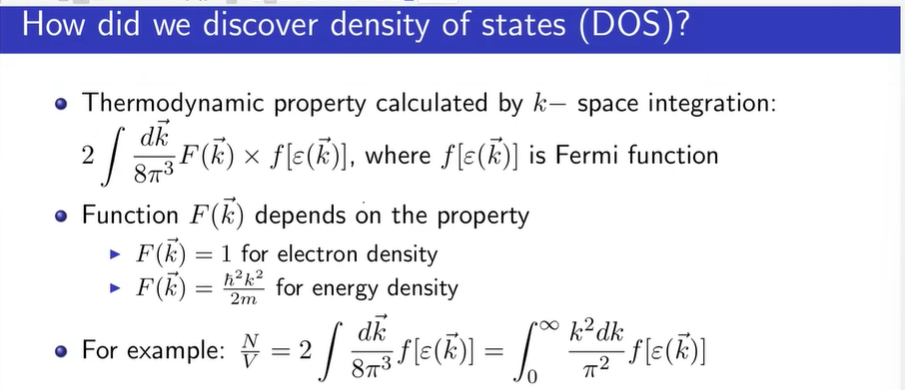
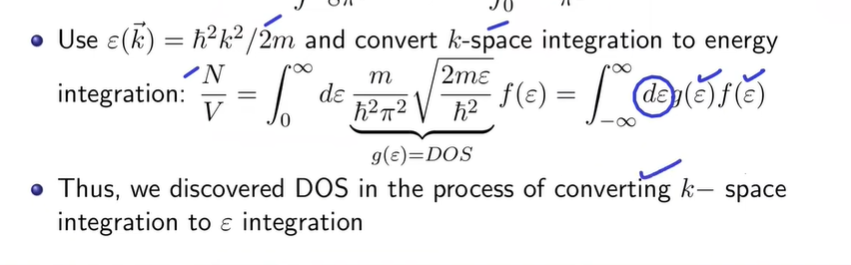
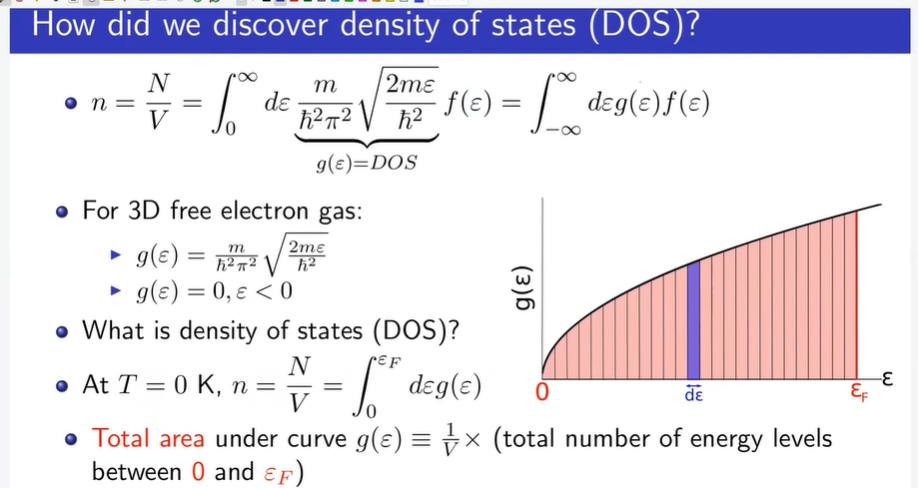
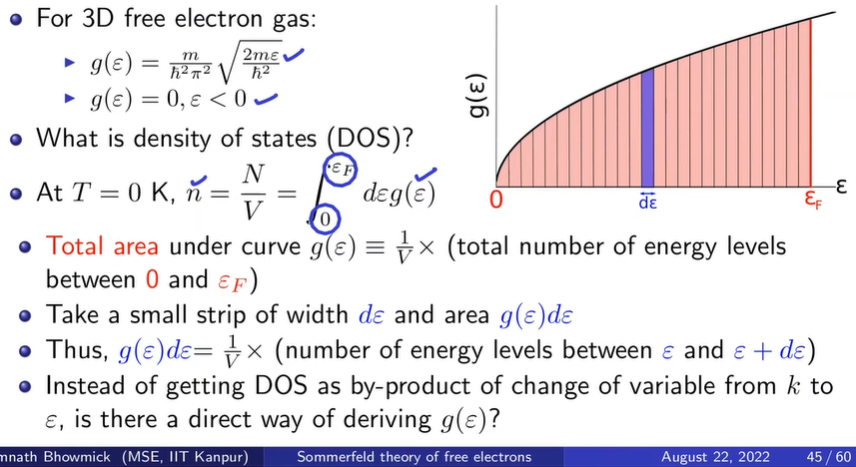

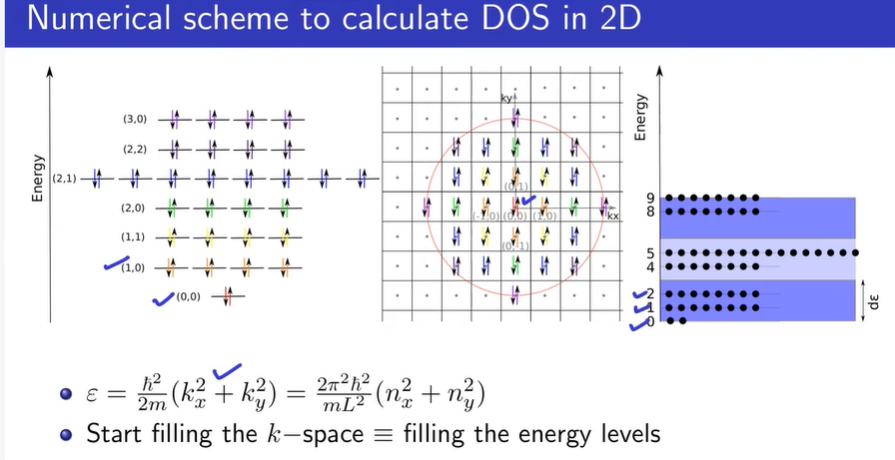
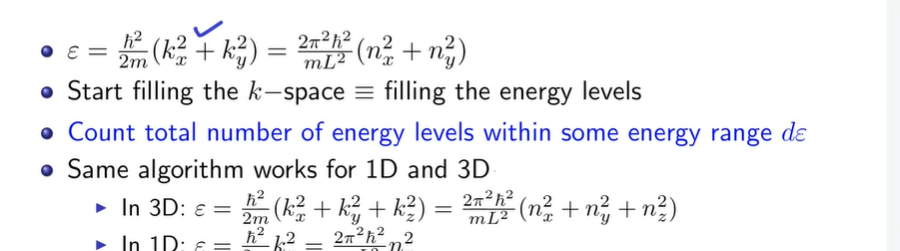

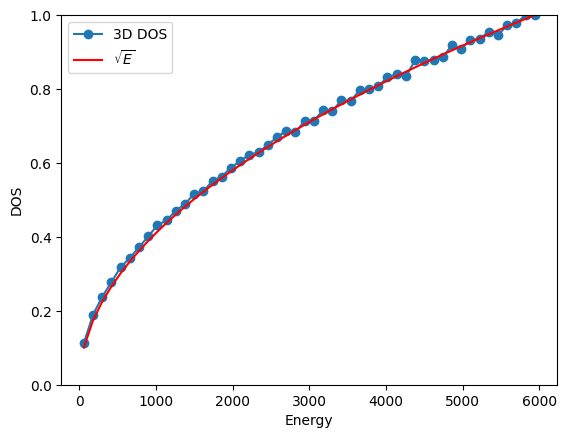

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#Number of k-points
n=100
#Energy range
ndos=50
dos=np.zeros(ndos,float)
en=np.zeros(ndos,float)
de= 120
#Loop to get DOS for 3D
for i in range(ndos):
    emin= i*de
    emax= (i+1) *de
    en[i]= emin+ de/2
    for j in range(n):
        for k in range(n):
            for l in range(n):
                eval= (j**2 + k**2 + l**2)
                if emin< eval<emax:
                    dos[i] +=1
maxdos = max(dos)
maxen = max(en)
plt.ylim(0,1)
plt.xlabel("Energy")
plt.ylabel("DOS")
plt.plot(en, dos/maxdos, label='3D DOS', marker='o')
# plot normalized sqrt(E) vs Energy
plt.plot(en, np.sqrt(en/maxen), color='r', label=r'$\sqrt{E}$')
plt.legend()
plt.show()


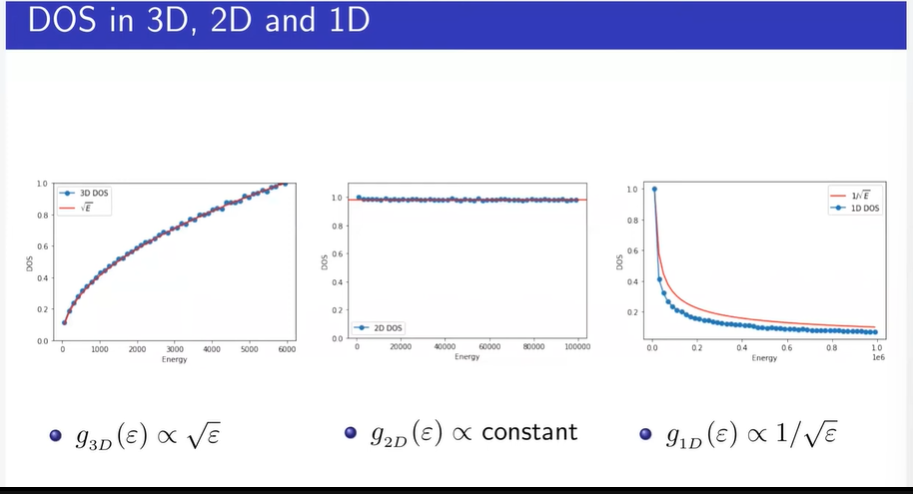

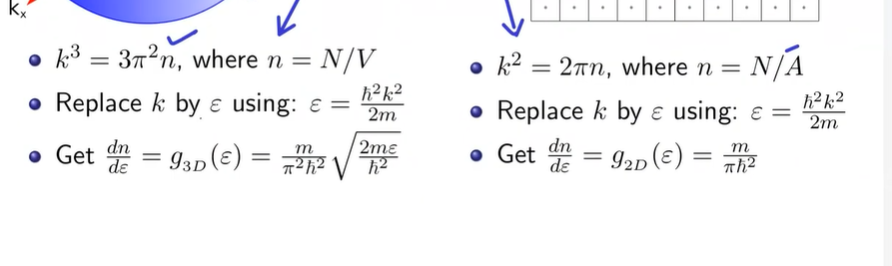

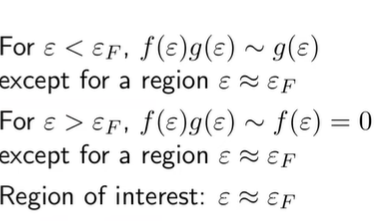

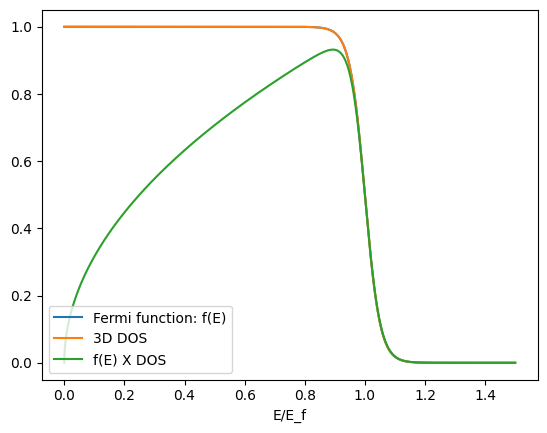

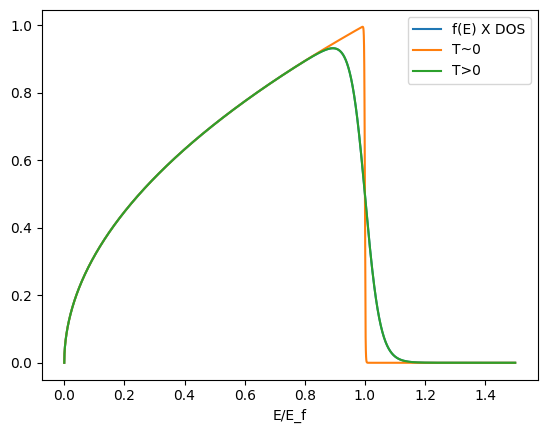

In [7]:
#3D: F(E) X G(E) AT T>0
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
kBT0=0.001
kBT=0.025
ef=1
b0=1/kBT0
b=1/kBT
e= np.linspace(0,1.5*ef,2000)
fe0=1.0/(np.exp(b0*(e-ef))+1.0)
fe=1.0/(np.exp(b*(e-ef))+1.0)
ge=np.sqrt(e)
plt.xlabel("E/E_f")
plt.plot(e,fe,label='Fermi function: f(E)')
plt.plot(e,fe,label='3D DOS')
plt.plot(e,fe*ge,label='f(E) X DOS')
plt.legend()
plt.show()

plt.xlabel("E/E_f")
plt.plot(e,fe*ge,label='f(E) X DOS')
plt.plot(e,fe0*ge,label='T~0')
plt.plot(e,fe*ge,label='T>0')
plt.legend()
plt.show()


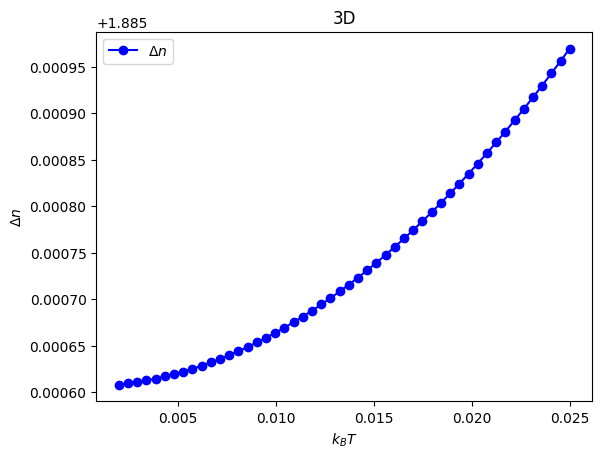

In [9]:
#Counting occupied states above Fermi energy at T>0
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
kBT= np.linspace(0.002,0.025,50) #Range of kBT
dn= np.zeros(50,float)
ef=2.0 #Fermi energy
n0=2.0*ef**1.5/3.0 #Number of electrons at T=0
for i in range(50):
    b=1/kBT[i]
    e= np.linspace(0,1.5*ef,2000)
    fe=1.0/(np.exp(b*(e-ef))+1.0)
    ge=np.sqrt(e)
    nt= scint.trapezoid(fe*ge,e)
    dn[i]= nt #Normalized change in number of electrons

plt.xlabel(r"$k_BT$")
plt.ylabel(r"$\Delta n$")
plt.title("3D")
plt.plot(kBT,dn,marker='o',color='b',label=r'$\Delta n$') 
plt.legend()
plt.show()   